### 텍스트 데이터 수집 및 워드 클라우드 생성
- 개별과제 
    - 네이버 브랜드 스토어의 상품 리뷰 데이터 수집
    - 그 외의 관심있는 텍스트 데이터 수집
    - 환경 : 개인 pc 주피터 노트북
- 조별과제
    - 워드 클라우드 만들기
    - 수집한 텍스트 데이터에 대한 형태소 분석
    - 환경 : colab 

In [6]:
# 개별과제 : 네이버 브랜드 스토어의 상품 리뷰 데이터 수집

In [9]:
from IPython.display import Image

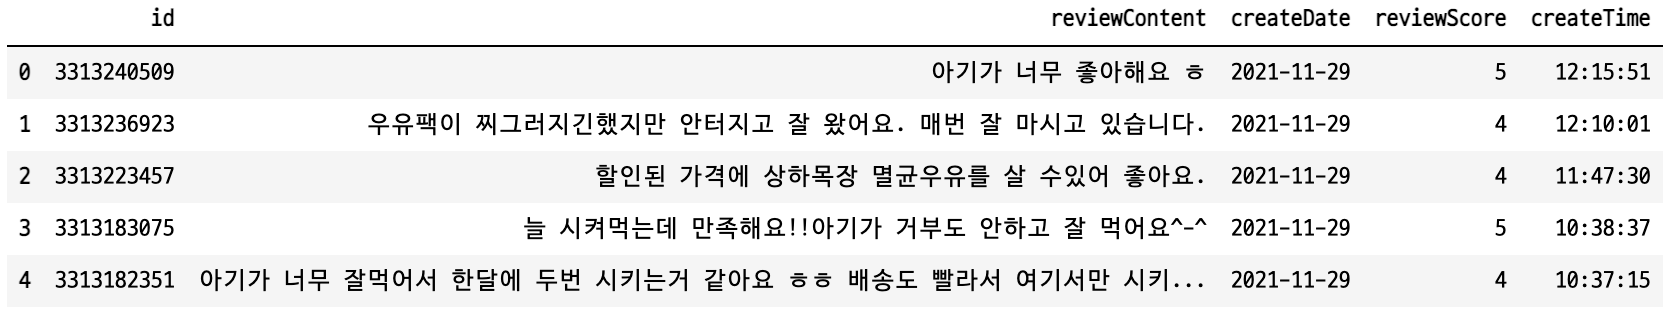

In [13]:
Image("/Users/kimtaehyeong/크롤링프로젝트/프로젝트2/imgs/wc_1.png")

# 시작

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm.notebook import tqdm
import time
import re
import sys
from selenium.webdriver.common.keys import Keys
keys = Keys()

In [16]:
# 1. 웹서비스 분석 : url

In [5]:
url = "https://brand.naver.com/underarmourkorea/products/5402090141"

In [ ]:
# json으로 받아와야 할 것 같음 실험을 위해 page_size,page 지정

In [77]:
page_size, page = 20, 2
url = f'https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize={page_size}&merchantNo=500164092&originProductNo=5380008389&sortType=REVIEW_RANKING'
url

'https://brand.naver.com/n/v1/reviews/paged-reviews?page=2&pageSize=20&merchantNo=500164092&originProductNo=5380008389&sortType=REVIEW_RANKING'

In [78]:
# 2. request(url) > response : json(str)

In [79]:
response = requests.get(url)

In [80]:
response

<Response [200]>

In [81]:
response.text[:200]

'{"contents":[{"id":"3344420024","reviewServiceType":"SELLBLOG","reviewType":"NORMAL","reviewContentClassType":"PHOTO","reviewContent":"배송 빠르고 옷도 편해요","createDate":"2022-01-11T14:29:11.761+0000","revie'

> 아 잘 찾았구나 !

In [82]:
datas = response.json()
type(datas)

dict

In [83]:
datas

{'contents': [{'id': '3344420024',
   'reviewServiceType': 'SELLBLOG',
   'reviewType': 'NORMAL',
   'reviewContentClassType': 'PHOTO',
   'reviewContent': '배송 빠르고 옷도 편해요',
   'createDate': '2022-01-11T14:29:11.761+0000',
   'reviewDisplayStatusType': 'NORMAL',
   'repurchase': False,
   'reviewScore': 5,
   'reviewRankingScore': -72.140625,
   'writerMemberId': 'jina****',
   'writerMemberIdNo': '',
   'writerMemberNo': 0,
   'writerMemberProfileImageUrl': 'https://phinf.pstatic.net/contact/20181109_158/15417738372229T7Y4_JPEG/image.jpg',
   'checkoutMerchantNo': 0,
   'checkoutMerchantId': '',
   'channelId': 500164092,
   'channelServiceType': 'STOREFARM',
   'orderNo': '',
   'productOrderNo': '',
   'productNo': '5402090141',
   'productName': '[언더아머 본사]남성 프로젝트 락 테리 팬츠 1361754-001',
   'productOptionContent': '선택: Black-L',
   'largeCategorizeCategoryId': '50000000',
   'middleCategorizeCategoryId': '50000169',
   'smallCategorizeCategoryId': '50000841',
   'productUrl': 'https://

In [84]:
len(datas['contents'])

20

In [85]:
datas['contents']

[{'id': '3344420024',
  'reviewServiceType': 'SELLBLOG',
  'reviewType': 'NORMAL',
  'reviewContentClassType': 'PHOTO',
  'reviewContent': '배송 빠르고 옷도 편해요',
  'createDate': '2022-01-11T14:29:11.761+0000',
  'reviewDisplayStatusType': 'NORMAL',
  'repurchase': False,
  'reviewScore': 5,
  'reviewRankingScore': -72.140625,
  'writerMemberId': 'jina****',
  'writerMemberIdNo': '',
  'writerMemberNo': 0,
  'writerMemberProfileImageUrl': 'https://phinf.pstatic.net/contact/20181109_158/15417738372229T7Y4_JPEG/image.jpg',
  'checkoutMerchantNo': 0,
  'checkoutMerchantId': '',
  'channelId': 500164092,
  'channelServiceType': 'STOREFARM',
  'orderNo': '',
  'productOrderNo': '',
  'productNo': '5402090141',
  'productName': '[언더아머 본사]남성 프로젝트 락 테리 팬츠 1361754-001',
  'productOptionContent': '선택: Black-L',
  'largeCategorizeCategoryId': '50000000',
  'middleCategorizeCategoryId': '50000169',
  'smallCategorizeCategoryId': '50000841',
  'productUrl': 'https://smartstore.naver.com/main/products/5402

> 개수도 정확

In [46]:
a = pd.DataFrame(datas['contents'])
b = a[columns]
b

,id,reviewContent,createDate,reviewScore
0,3344420024,배송 빠르고 옷도 편해요,2022-01-11T14:29:11.761+0000,5
1,3335729879,상품의 질이 기대 이상으로 좋습니다 \n만족스러운 구매였네요\n추천합니다,2021-12-30T10:30:31.895+0000,5
2,3357930830,사이즈도 정사이즈이고 착용감도 좋습니다,2022-01-31T14:02:06.009+0000,5
3,3342325784,가성비 대비 그럭 저럭\n기장은 잘 맞고\n두껍지는 않습니다,2022-01-08T14:53:30.035+0000,5
4,3346179743,빠른 배송이 좋아요,2022-01-14T00:16:45.939+0000,4
5,3344740516,빠른 배송으로 잘 받았습니다.,2022-01-12T04:41:30.270+0000,5
6,3353442662,재질도좋고 아주 맘에듭니다\n싸이즈는 좀 작게 나왔네요,2022-01-24T01:25:35.508+0000,5
7,3335275771,타올지같은 재질에 핏감이 아주 좋아요\n너무 이뻐서 프로젝트 락으로 더 구매하고 싶...,2021-12-30T00:41:51.973+0000,5
8,3342049246,언더아머는 항상 믿고사요,2022-01-08T07:22:55.829+0000,5
9,3342086174,감사합니다 잘입겠습니다,2022-01-08T08:16:40.914+0000,5


## 함수화

In [88]:
def naver_review(page_size=20,page=1):
    url = f'https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize={page_size}&merchantNo=500164092&originProductNo=5380008389&sortType=REVIEW_RANKING'
    review = []
    response = requests.get(url)
    datas = response.json()
    reviews = datas['contents']
    for i in range(len(reviews)):
        a = (datas['contents'][i]['id'], datas['contents'][i]['reviewContent'], datas['contents'][i]['createDate'][:10],datas['contents'][i]['reviewScore'], datas['contents'][i]['createDate'][11:19])
        review.append(a)
    column_name = ['id','reviewContent','createDate','reviewScore', 'createTime'] 
    b = pd.DataFrame(review, columns=column_name)
    
    return b
        
naver_review(20,1)    

,id,reviewContent,createDate,reviewScore,createTime
0,3364540375,신랑 사줬는데 잘 입고 다니네요~ 편하대요~\n원래 검은색인데 빛때문에 회색처럼 나...,2022-02-10,5,13:12:43
1,3371591479,부담없이입고운동할만합니다,2022-02-20,4,01:07:18
2,3373232694,편하고 좋습니다 ~,2022-02-22,5,09:19:21
3,3359808567,"핏좋코, 사이즈도 딱 좋아서 대만족입니다.",2022-02-04,5,21:42:46
4,3356706410,입어보니 많이 편하네요. 잘 입고 있습니다~^^,2022-01-28,5,10:38:16
5,3371808784,좋아요. 감사합니다.,2022-02-20,5,06:59:42
6,3358067143,"조금 타이트하고, 색상은 물이 조금 빠진듯 한 느낌이 나네요. 운동할 때는 잘 입고...",2022-02-01,5,07:04:10
7,3368570890,잘 입고 있습니다.\n수고하셨습니다,2022-02-16,5,02:17:48
8,3342208046,정사이즈 편안합니다. 빈티지스러운 양쪽프린팅 언더아머 마크와 프로젝트락 황소가 있습...,2022-01-08,5,11:33:51
9,3366880643,편하고 핏도 괜찮아요,2022-02-13,5,16:28:48


In [95]:
def naver_review(page_size=20,page=1):
    url = f'https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize={page_size}&merchantNo=500164092&originProductNo=5380008389&sortType=REVIEW_RANKING'
    review = []
    response = requests.get(url)
    datas = response.json()
    reviews = datas['contents']
    
    for i in range(len(reviews)):
        a = (datas['contents'][i]['id'], datas['contents'][i]['reviewContent'], datas['contents'][i]['createDate'][:10],datas['contents'][i]['reviewScore'], datas['contents'][i]['createDate'][11:19])
        review.append(a)
    column_name = ['id','reviewContent','createDate','reviewScore', 'createTime'] 
    b = pd.DataFrame(review, columns=column_name)
    
    return b
        
naver_review(20,1)  
    

,id,reviewContent,createDate,reviewScore,createTime
0,3364540375,신랑 사줬는데 잘 입고 다니네요~ 편하대요~\n원래 검은색인데 빛때문에 회색처럼 나...,2022-02-10,5,13:12:43
1,3371591479,부담없이입고운동할만합니다,2022-02-20,4,01:07:18
2,3373232694,편하고 좋습니다 ~,2022-02-22,5,09:19:21
3,3359808567,"핏좋코, 사이즈도 딱 좋아서 대만족입니다.",2022-02-04,5,21:42:46
4,3356706410,입어보니 많이 편하네요. 잘 입고 있습니다~^^,2022-01-28,5,10:38:16
5,3371808784,좋아요. 감사합니다.,2022-02-20,5,06:59:42
6,3358067143,"조금 타이트하고, 색상은 물이 조금 빠진듯 한 느낌이 나네요. 운동할 때는 잘 입고...",2022-02-01,5,07:04:10
7,3368570890,잘 입고 있습니다.\n수고하셨습니다,2022-02-16,5,02:17:48
8,3342208046,정사이즈 편안합니다. 빈티지스러운 양쪽프린팅 언더아머 마크와 프로젝트락 황소가 있습...,2022-01-08,5,11:33:51
9,3366880643,편하고 핏도 괜찮아요,2022-02-13,5,16:28:48


In [128]:
a = []
for page in range(1,9):
    a.append(naver_review(20,page))
a

[            id                                      reviewContent  createDate  \
 0   3364540375  신랑 사줬는데 잘 입고 다니네요~ 편하대요~\n원래 검은색인데 빛때문에 회색처럼 나...  2022-02-10   
 1   3371591479                                      부담없이입고운동할만합니다  2022-02-20   
 2   3373232694                                         편하고 좋습니다 ~  2022-02-22   
 3   3359808567                            핏좋코, 사이즈도 딱 좋아서 대만족입니다.  2022-02-04   
 4   3356706410                         입어보니 많이 편하네요. 잘 입고 있습니다~^^  2022-01-28   
 5   3371808784                                        좋아요. 감사합니다.  2022-02-20   
 6   3358067143  조금 타이트하고, 색상은 물이 조금 빠진듯 한 느낌이 나네요. 운동할 때는 잘 입고...  2022-02-01   
 7   3368570890                                잘 입고 있습니다.\n수고하셨습니다  2022-02-16   
 8   3342208046  정사이즈 편안합니다. 빈티지스러운 양쪽프린팅 언더아머 마크와 프로젝트락 황소가 있습...  2022-01-08   
 9   3366880643                                       편하고  핏도 괜찮아요  2022-02-13   
 10  3354395913                                  사이즈 한치수 업 하셔야 될듯ᆢ  2022-01-25   
 11  3363707811 

In [130]:
b = pd.concat(a, ignore_index=True)
b

,id,reviewContent,createDate,reviewScore,createTime
0,3364540375,신랑 사줬는데 잘 입고 다니네요~ 편하대요~\n원래 검은색인데 빛때문에 회색처럼 나...,2022-02-10,5,13:12:43
1,3371591479,부담없이입고운동할만합니다,2022-02-20,4,01:07:18
2,3373232694,편하고 좋습니다 ~,2022-02-22,5,09:19:21
3,3359808567,"핏좋코, 사이즈도 딱 좋아서 대만족입니다.",2022-02-04,5,21:42:46
4,3356706410,입어보니 많이 편하네요. 잘 입고 있습니다~^^,2022-01-28,5,10:38:16
...,...,...,...,...,...
151,3171505240,언더아머 성애자로써 근육질은 아니지만\n락 제품은 슬림하고 편안하게 늘 착용시 만족...,2021-05-09,5,22:42:41
152,3180247581,감사합니다~~~~~,2021-05-21,5,15:57:24
153,3159264913,"요즘 입기 좋을듯 해요. 너무 두껍지 않고, 길이랑 핏이랑 좋아요.",2021-04-22,5,00:16:50
154,3165418256,딱맞고 핏도 이뻐요,2021-04-30,5,13:39:56


In [118]:
a = naver_review(20,1)
b = naver_review(20,2)
c = naver_review(20,3)
d = naver_review(20,4)
e = naver_review(20,5)
f = naver_review(20,6)
g = naver_review(20,7)
h = naver_review(20,8)

underarmor_review = pd.concat([a,b,c,d,e,f,g,h],ignore_index=True)
underarmor_review

,id,reviewContent,createDate,reviewScore,createTime
0,3364540375,신랑 사줬는데 잘 입고 다니네요~ 편하대요~\n원래 검은색인데 빛때문에 회색처럼 나...,2022-02-10,5,13:12:43
1,3371591479,부담없이입고운동할만합니다,2022-02-20,4,01:07:18
2,3373232694,편하고 좋습니다 ~,2022-02-22,5,09:19:21
3,3359808567,"핏좋코, 사이즈도 딱 좋아서 대만족입니다.",2022-02-04,5,21:42:46
4,3356706410,입어보니 많이 편하네요. 잘 입고 있습니다~^^,2022-01-28,5,10:38:16
...,...,...,...,...,...
151,3171505240,언더아머 성애자로써 근육질은 아니지만\n락 제품은 슬림하고 편안하게 늘 착용시 만족...,2021-05-09,5,22:42:41
152,3180247581,감사합니다~~~~~,2021-05-21,5,15:57:24
153,3159264913,"요즘 입기 좋을듯 해요. 너무 두껍지 않고, 길이랑 핏이랑 좋아요.",2021-04-22,5,00:16:50
154,3165418256,딱맞고 핏도 이뻐요,2021-04-30,5,13:39:56


In [127]:
underarmor_review.to_csv("underarmor.csv")

In [ ]:
# 셀레니움 스킵

url = "https://brand.naver.com/underarmourkorea/products/5402090141"
driver = webdriver.Chrome('/opt/homebrew/bin/chromedriver')
driver.get(url)
time.sleep(2)

from selenium import webdriver

count = 0
stop= int(input("몇 세트 크롤링 할까요? (1-11 페이지가 한세트: )"))
next_btn = []

driver.quit()

In [14]:
# 조별과제 : 추가적인 텍스트 데이터 수집 + 워드 클라우드만드리& EDA

<img src = "/Users/kimtaehyeong/크롤링프로젝트/프로젝트2/imgs/wc_2.png">